# Laboratorio su Misure di Tendenza Centrale, Dispersione e Forma

Per esaminare gli strumenti in oggetto, ci avvremo del dataset **Titanic**. Si tratta di un dataset classico, che riporta alcune informazioni, quali sesso, età, classe di imbarco e sopravvivenza di alcuni passaggeri del Titanic. Troviamo una versione del dataset al seguente URL:

https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv

Carichiamo il dataset mediante la libreria Pandas:

In [2]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')

Visualizziamo alcune informazioni sul dataset:

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Il dataset contiene $891$ osservazioni e $11$ colonne. Visualizziamo le prime righe del DataFrame per vedere com'è organizzato:

In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Numerosità

La numerosità dei campioni costituiti dalle singole colonne può essere ottenuta mediante il metodo `len`:

In [5]:
print(len(titanic['Age']))

891


Il metodo `len` però non considera i dati incompleti (la colonna potrebbe contenere dei `NaN`). Per ottenere un conteggio più corretto possiamo esplicitamente eliminare i `NaN` con `dropna`:

In [6]:
print(len(titanic['Age'].dropna()))

714


Come possiamo notare, il campione è meno numeroso di quello che sembrava. Alternativamente possiamo richiamare `info` sul DataFrame:

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Lo schema sopra mostra il numero di oggetti `non-null` per ogni colonna. Coerentemente con quanto visto prima, abbiamo solo $714$ elementi di `Age` validi.

> **🙋‍♂️ Domanda 1**
>
> Qual è la numerosità di `Cabin`?

## Indicatori Centrali: Media, Mediana e Moda


### Media

Possiamo calcolarlo manualmente la media come segue

In [8]:
titanic['Age'].sum()/len(titanic['Age'].dropna())

29.69911764705882

O semplicemente mediante la funzione `mean`:

In [9]:
titanic['Age'].mean()

29.69911764705882


> **🙋‍♂️ Domanda 2**
>
> In quali casi la media riassume bene i dati? In quali casi no?

### Mediana

Possiamo calcolare la mediana manualmente come segue:

In [10]:
import numpy as np
a=pd.Series([1,-2,3,-4,7])
print(a.sort_values())
print("Mediana: {}".format(a.sort_values().iloc[2]))

3   -4
1   -2
0    1
2    3
4    7
dtype: int64
Mediana: 1


o alternativamente mediante il metodo `median`:

In [11]:
a.median()

1.0

Calcoliamo ad esempio il valore mediano di `Age`:

In [12]:
titanic['Age'].median()

28.0


> **🙋‍♂️ Domanda 3**
>
> Si confronti la media di `Age` con la sua mediana. I due valori corrispondono? Perché? Quali dei due valori è uguale a uno dei valori appartenente al campione?

### Quantili, Percentili e Quartili

In pandas, i quantili si ottengono mediante il metodo `quantile`:

In [13]:
print("Quantile di ordine 0 (minimo):", titanic['Age'].quantile(0))
print("Quantile di ordine 0.5 (mediana):", titanic['Age'].quantile(0.5))
print("Quantile di ordine 1 (massimo):", titanic['Age'].quantile(1))
print("Quantile di ordine 0.15:", titanic['Age'].quantile(0.15))

Quantile di ordine 0 (minimo): 0.42
Quantile di ordine 0.5 (mediana): 28.0
Quantile di ordine 1 (massimo): 80.0
Quantile di ordine 0.15: 17.0


I percentili si ottengono sempre mediante la funzione `quantile`, dividendo l'ordine per percentile per 100:

In [14]:
print("Percentile di ordine 50% (mediana):", titanic['Age'].quantile(50/100))
print("Percentile di ordine 30%:", titanic['Age'].quantile(30/100))

Percentile di ordine 50% (mediana): 28.0
Percentile di ordine 30%: 22.0


Analogamente, i quartili si ottengono dividendo l'ordine del quartile per 4:

In [15]:
print("Quartile di ordine 0 (minimo):", titanic['Age'].quantile(0/4))
print("Quartile di ordine 1:", titanic['Age'].quantile(1/4))
print("Quartile di ordine 2 (mediana):", titanic['Age'].quantile(2/4))
print("Quartile di ordine 3:", titanic['Age'].quantile(3/4))
print("Quartile di ordine 4 (massimo):", titanic['Age'].quantile(4/4))

Quartile di ordine 0 (minimo): 0.42
Quartile di ordine 1: 20.125
Quartile di ordine 2 (mediana): 28.0
Quartile di ordine 3: 38.0
Quartile di ordine 4 (massimo): 80.0



> **🙋‍♂️ Domanda 4**
>
> Anche i quartili, come il minimo e il massimo, permettono di farsi un'idea dell'ordine di grandezza dei dati analizzati, tuttavia, i quartili hanno un vantaggio, quale?

### Moda
Possiamo calcolare la moda manualmente come segue:

In [16]:
print(titanic['Age'].value_counts().head())
print("Moda: ",titanic['Age'].value_counts().index[0])

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64
Moda:  24.0


Alternativamente, possiamo usare la funzione `mode`:

In [17]:
titanic['Age'].mode()

0    24.0
Name: Age, dtype: float64


> **🙋‍♂️ Domanda 5**
>
> Si confrontino la moda di `Age` con la sua media. I valori corrispondono? Perché? 

## Indicatori di dispersione

### Minimo, Massimo e Range
Massimo, minimo e range vengono calcolati semplicemente come segue:

In [18]:
print("Minimo:", titanic['Age'].min())
print("Massimo:", titanic['Age'].max())
print("Range:", titanic['Age'].max() - titanic['Age'].min())

Minimo: 0.42
Massimo: 80.0
Range: 79.58



> **🙋‍♂️ Domanda 6**
>
> Il range è un indicatore di dispersione robusto alla presenza di "outliers"?

### Distanza interquartile
Possiamo calcolare la distanza interquartile come segue:

In [19]:
q11,q13 = titanic[titanic['Sex']=='male']['Age'].quantile([1/4,3/4])
q21,q23 = titanic[titanic['Sex']=='female']['Age'].quantile([1/4,3/4])
print("Lo scarto interquartile di sample 1 è:",q13-q11)
print("Lo scarto interquartile di sample 2 è:",q23-q21)

Lo scarto interquartile di sample 1 è: 18.0
Lo scarto interquartile di sample 2 è: 19.0


> **🙋‍♂️ Domanda 7**
>
> La distanza interquartile è sempre una misura di dispersione robusta? Cosa succede nel caso di distribuzioni fortemente asimmetriche?

### Varianza e Deviazione Standard


La varianza può essere calcolata richiamando il metodo `var`:

In [20]:
print(titanic[titanic['Sex']=='male']['Age'].var())
print(titanic[titanic['Sex']=='female']['Age'].var())

215.44957942429036
199.0962330533453


La **deviazione standard** si calcola mediante il metodo `std`:

In [21]:
print("Deviazione standard del campione:",titanic['Age'].std(),"anni")

Deviazione standard del campione: 14.526497332334044 anni


La deviazione standard ci dice qualcosa anche sulla "forma" della distribuzione. Confrontiamo ad esempio le deviazioni standard delle età dei passeggeri appartenenti alle tre classi di imbarco:

In [22]:
titanic.groupby('Pclass')['Age'].std()

Pclass
1    14.802856
2    14.001077
3    12.495398
Name: Age, dtype: float64

Confrontiamo adesso le densità stimate dai tre campioni:

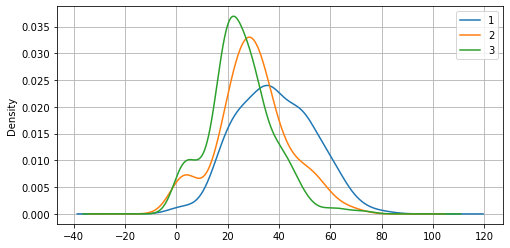

In [24]:
from matplotlib import pyplot as plt
titanic.groupby('Pclass')['Age'].plot.density(figsize=(8,4))
plt.grid()
plt.legend()
plt.show()

> **🙋‍♂️ Domanda 8**
>
> Esiste una relazione tra le deviazioni standard dei campioni e le relative densità? Quale?

#### Normalizzazione tra 0 e 1
Secondo la normalizzazione tra 0 e 1, i dati vengono riscalati come segue:

$$
x_{norm} = (x-x_{min})/(x_{max}-x_{min})
$$

Possiamo effettuare questa trasformazione in Pandas come segue:

In [25]:
age_norm_01 = (titanic['Age']-titanic['Age'].min())/(titanic['Age'].max()-titanic['Age'].min())

Verifichiamo che gli estremi del nuovo campione siano 0 e 1:

In [26]:
print(age_norm_01.min(), age_norm_01.max())

0.0 1.0


#### Normalizzazione tra -1 e 1
I dati vengono riscalati come segue:

$$
x_{norm} = (x_{max}+x_{min}-2\cdot x)/(x_{max}-x_{min})
$$

Possiamo effettuare questa trasformazione in Pandas come segue:

In [27]:
age_norm_11 = (titanic['Age'].max()+titanic['Age'].min()-2*titanic['Age'])/(titanic['Age'].max()-titanic['Age'].min())

Verifichiamo che gli estremi del nuovo campione siano -1 e 1:

In [28]:
print(age_norm_11.min(), age_norm_11.max())

-1.0 1.0


### Standardizzazione (z-scoring)

Possiamo effettuare questa normalizzazione usando la funzione `zscore` di `scipy`:

In [29]:
from scipy.stats import zscore
zscore([0,1,2,3,4])

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

Applichiamo questa normalizzazione alle età dei passeggeri del Titanic:

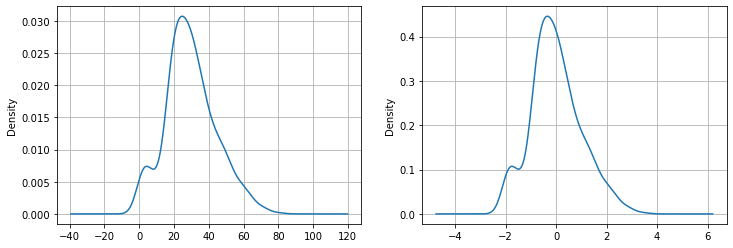

In [38]:
age_z=zscore(titanic['Age'].dropna())
plt.figure(figsize=(12,4))
plt.subplot(121)
titanic['Age'].plot.density()
plt.grid()
plt.subplot(122)
age_z.plot.density()
plt.grid()
plt.show()

### Indicatori di Forma

#### Asimmetria (skewness)
Posso calcolare il valore di skewness mediante il metodo di Pandas `skew`. Vediamo un paio di esempi sul dataset di pesi e altezze:

In [81]:
titanic.skew()

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_31494/1596635564.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.skew()


Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Confrontiamo i risultati con le stime di densità:

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

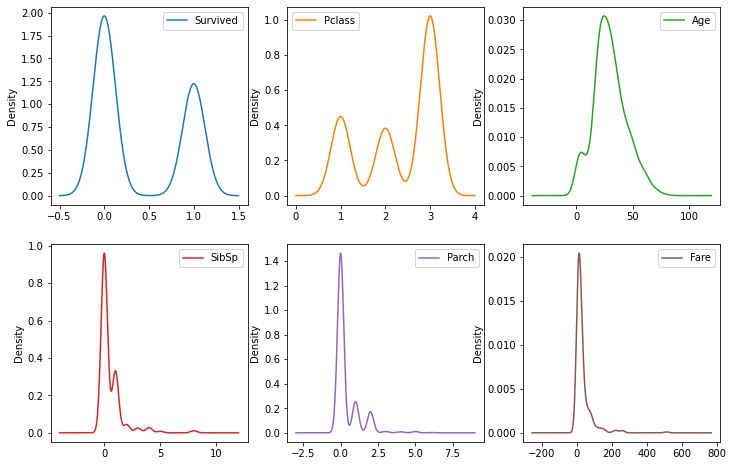

In [76]:
titanic.plot.density(subplots=True, layout=(2,3), figsize=(12,8), sharex=False)

I valori di skewness di pesi e altezze sarnno:

In [77]:
import pandas as pd
hw=pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')

print(f"Skweness pesi: {hw['weight'].skew():0.2f}")
print(f"Skweness altezza: {hw['height'].skew():0.2f}")

Skweness pesi: 0.57
Skweness altezza: 0.19


Confrontando con le densità:

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

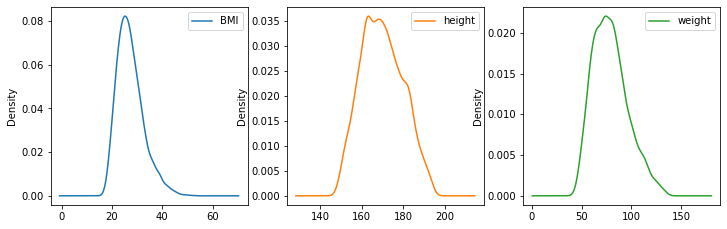

In [78]:
hw.plot.density(subplots=True, layout=(2,3), figsize=(12,8), sharex=False)

#### Curtosi (kurtosis)
Analogamente, possiamo calcolare la curtosi con il metodo `Kurtosis`:

In [85]:
titanic.kurtosis()

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_31494/3071249296.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic.kurtosis()


Survived    -1.775005
Pclass      -1.280015
Age          0.178274
SibSp       17.880420
Parch        9.778125
Fare        33.398141
dtype: float64

In [86]:
hw.kurtosis()

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_31494/4227707798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hw.kurtosis()


BMI       0.917179
height   -0.687287
weight   -0.056386
dtype: float64

## Boxplot

Possiamo visualizzare un boxplot direttamente mediante `Pandas`:

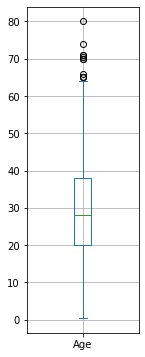

In [39]:
from matplotlib import pyplot as plt
titanic['Age'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

Alternativamente, possiamo mostrare un boxplot mediante matplotlib:

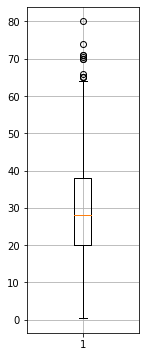

In [40]:
plt.figure(figsize=(2,6))
plt.boxplot(titanic['Age'].dropna())#inseriamo dropna per eliminare i NaN
plt.grid()
plt.show()

### Boxplot Multipli

Mediante `Pandas` è possibile mostrare i boxplot di tutte le variabili numeriche di un DataFrame come segue:

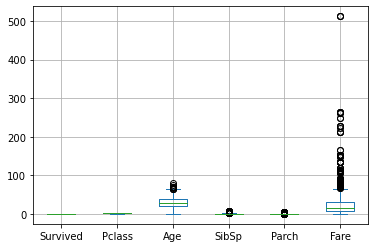

In [41]:
titanic.plot.box()
plt.grid()
plt.show()

Se vogliamo restringere l'analisi ad alcune variabili, possiamo selezionare solo le variabili interessate come segue:

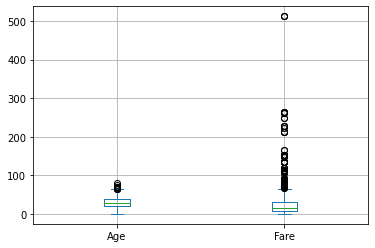

In [42]:
titanic[['Age','Fare']].plot.box()
plt.grid()
plt.show()

E' inoltre possibile confrontare i boxplot di diversi campioni. Supponiamo di voler confrontare le età di uomini e donne:

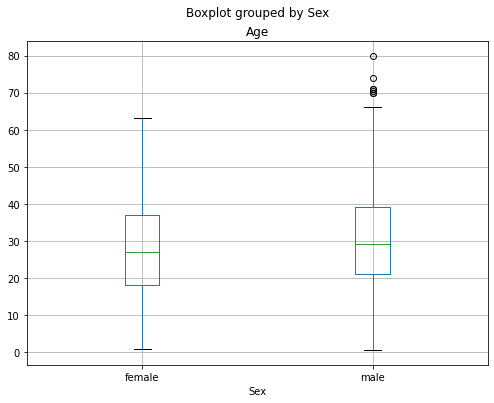

In [43]:
titanic.boxplot(by='Sex',column=['Age'], figsize=(8,6))
plt.show()

Nel caso di variabili multiple:

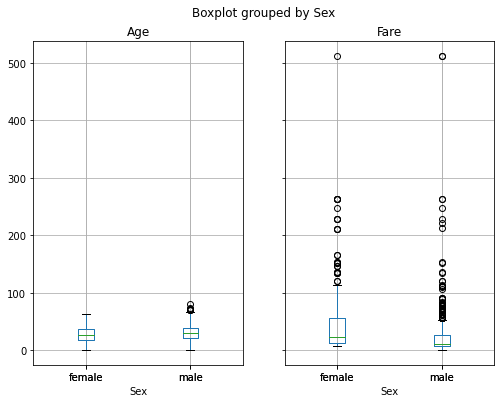

In [44]:
titanic.boxplot(by='Sex',column=['Age','Fare'], figsize=(8,6))
plt.show()

Possiamo anche combinare i boxplot con un `groupby`. Confrontiamo ad esempio le tariffe pagate da e donne appartenenti alle tre classi di imbarco:

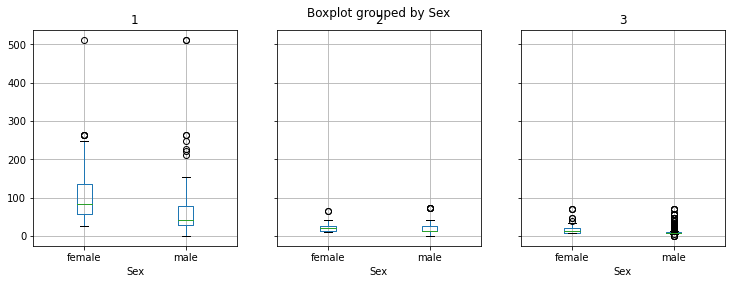

In [45]:
titanic.groupby('Pclass').boxplot(by='Sex',column=['Fare'], figsize=(12,4), layout=(1,3))
plt.show()

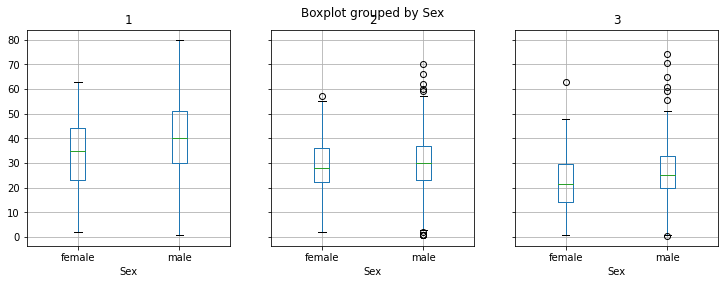

In [46]:
titanic.groupby('Pclass').boxplot(by='Sex',column=['Age'], figsize=(12,4), layout=(1,3))
plt.show()

> **🙋‍♂️ Domanda 9**
>
> Si confrontino le età di donne e uomini nelle varie classi di imbarco. In quale classe esistano differenze notevoli tra le età di uomini e donne?

## Esercizi

> 🧑‍💻 Esercizio 1
> 
> Considerando il dataset Titanic, si calcolino per ogni variabile la numerosità, la media, la deviazione standard, il minimo, il massimo, il valore mediano, il primo e il terzo quartile. Dopo aver calcolato i valori richiesti individualmente, si utilizzi il metodo `describe` per ottenere tali valori. Qual è la variabile più dispersa?

> 🧑‍💻 Esercizio 2
> 
> Considerando il dataset Titanic, per ognuna delle tre classi, si calcolino medie e varianze delle età dei passeggeri. In quale classe le età sono meno disperse? Quale classe contiene i soggetti più giovani? Si completi l'analisi con dei grafici a barre.